## Question 1
#### What type of algorithm would you use to segment a company customers database into multiple groups?

If you don’t know how to define the groups, then you can use a clustering algorithm (unsupervised learning), such as k-means, to segment your customers into clusters of similar
customers. However, if you know what groups you would like to have, then you can feed
many examples of each group to a classification algorithm (supervised learning), and it will
classify all the customers into these groups.

## Question 2
#### Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem? Explain.

I would frame the problem of spam detection as a supervised learning problem. A supervised learning algorithm has already been trained in a model and it is ready to accurately predict whether the unknown is a spam or not.

Oscar's: Spam detection is a typical supervised learning problem: the algorithm is fed many emails
along with their labels (spam or not spam).

## Question 3
#### What is a test set, and why would you want to use it?

Basically, a test set is a small random sample (20%-30%) of the dataset and I would use it to measure the performance of the trained model. 

Oscar's: The test set is used to estimate the error that a model will make on new observations, before
the model in launched in a production environment.

## Question 4
#### You are training a classification model with 100 variables/features that achieves 95% accuracy in the training dataset. However, when you run it in the test dataset, you only get 60% accuracy. Which of the following options are valid approached to solve this problem?

#### (e) (a) and (c)

This is clearly an overfitting issue. In order to solve this type of problem, you could reduce
the excessive number of features (which will reduce the complexity of the model and make it
less dependent on the training set). Additionally, you could also implement cross-validation
during the training process.

## Question 5
#### Consider the Real Estate.csv data, this file contains information related to 414 houses. The goal is to predict the house price of unit area. In Python, answer the following:

#### (a) Using the pandas library, read the csv data file and create a data-frame called house price.

In [1]:
import boto3
import pandas as pd
import numpy as np

# Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'gabrielferreira-data-455-bucket'
bucket = s3.Bucket(bucket_name)

# Defining the file to be read from s3 bucket
file_key = "Real_Estate.csv"

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# Reading the csv file
house_price = pd.read_csv(file_content_stream)
house_price.head(1)

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9


#### (b) Drop the No and transaction date columns.

In [2]:
# Removing No and transaction date columns.
house_price = house_price.drop(['No', 'transaction_date'], axis = 1)
house_price.head(1)

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9


#### (c)  Split the data-frame into two data-frames: train (80%) and test (20%).

In [3]:
from sklearn.model_selection import train_test_split

# Defining input and target variables
X = house_price[['house_age', 'distance_to_the_nearest_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude']]
Y = house_price['house_price_of_unit_area']


# Splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

#### (d) Using the train data-frame, build a linear regression model in which: house age, distance to the nearest MRT station, number of convenience stores, latitude, and longitude are the input variables, and house price of unit area is the target variable. After the model is built, predict the house price of unit area of a the houses in the test data-frame. Report the MSE.

In [4]:
from sklearn.linear_model import LinearRegression

# Building a linear regression model
lm_md = LinearRegression().fit(X_train, Y_train)

# Getting houses price predictions
preds = lm_md.predict(X_test)

In [5]:
# Computing the mse (mean square error)
mse = np.mean(np.power(preds - Y_test, 2))
mse

155.76531233009234

#### (e) Using the train data-frame, build a linear regression model in which: house age, number of convenience stores, latitude, and longitude are the input variables, and house price of unit area is the target variable. After the model is built, predict the house price of unit area of a the houses in the test data-frame. Report the MSE.


In [6]:
# Defining input and target variables for the new model
X_train_new = X_train.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1)
X_test_new = X_test.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1)

# Building the linear model
lm_md_2 = LinearRegression().fit(X_train_new, Y_train)

# Getting houses price prediction
preds = lm_md_2.predict(X_test_new)

In [7]:
# Computing the sme
mse = np.mean(np.power(preds - Y_test, 2))
mse

163.34577472571445

#### (f) Using the results from parts (d) and (e), what model would use? Explain.

Based on the results from parts (d) and (e), I would use the first model (lm_md) because its mean square error (mse) is smaller than the second model (lm_md_2). Being smaller means that the model is making more accurate predictions.

#### (g) Repeat steps (c) to (e) 100 times, and visualize the MSE of each of the models at each iteration. Which of the two model has better performance on the test datasets? Explain.

In [8]:
# Creating lists to store the mse results
lm_md_1_results = list()
lm_md_2_results = list()

for i in range(0, 100):

    # Splitting the data into train and test
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    
    # Defining input and target variables for the new model
    X_train_new = X_train.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1)
    X_test_new = X_test.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1)
    
    # Building model 1
    lm_md_1 = LinearRegression().fit(X_train, Y_train)
    
    # Getting predictions from model 1
    preds = lm_md_1.predict(X_test)
    
    # Computing the mse from model 1
    mse_1 = np.mean(np.power(preds - Y_test, 2))
    
    # Adding results to lm_md_1_results
    lm_md_1_results.append(mse_1)

    
    # Building model 2
    lm_md_2 = LinearRegression().fit(X_train_new, Y_train)
    
    # Getting prediction from model 2
    preds_2 = lm_md_2.predict(X_test_new)
    
    # Computing de mse from model 2
    mse_2 = np.mean(np.power(preds_2 - Y_test, 2))
    
    # Computing the mse results from model 2
    lm_md_2_results.append(mse_2)
    
    
lm_md_results = pd.DataFrame({"Model_1" : lm_md_1_results, "Model_2": lm_md_2_results})
lm_md_results.head()

,Model_1,Model_2
0,57.453191,69.543322
1,58.878585,65.014728
2,64.521615,66.384462
3,151.309067,168.543994
4,52.687999,57.897869


In [23]:
lm_md_results.describe()

,Model_1,Model_2
count,100.000000,100.000000
mean,78.914930,84.849303
std,28.810746,31.550652
min,39.310558,38.190302
25%,60.499067,64.799443
50%,69.814061,74.361773
75%,86.709791,93.284101
max,159.094652,166.528964


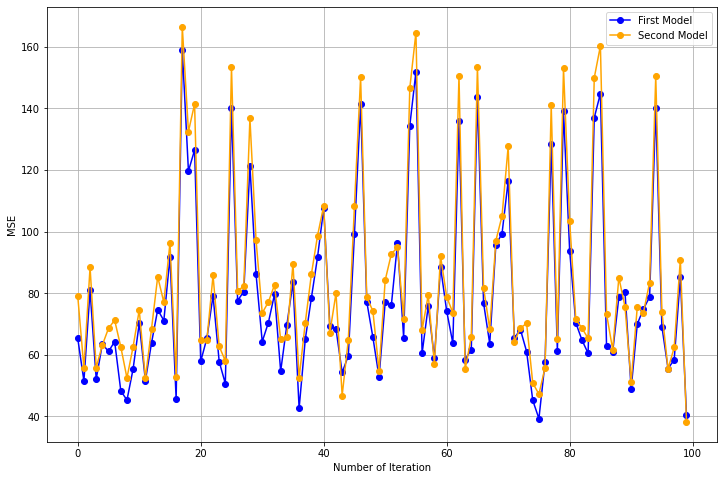

In [29]:
# Visualizing model 1
import matplotlib.pyplot as plt

## Plotting iteration results
fig = plt.figure(figsize = (12, 8))

iterations = range(0, 100)
plt.plot(iterations, lm_md_1_results, marker = 'o', color = 'blue',
         label = 'First Model')
plt.plot(iterations, lm_md_2_results, marker = 'o', color = 'orange',
        label = 'Second Model')
plt.xlabel('Number of Iteration')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()

From the above figure, we see that first model (d) has better performance than second model (e) because
in most of the iterations it has a smaller mean square error.